In [1]:
#元々インポートしてあったモジュール
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#新たに作成したモジュールなどをimport
import sys
import json
import requests
import os
sys.path.append("../src")
from utils import dataframe_to_dict, inference_to_new_data, get_psg_cls_list

host_name = "http://localhost:8081"

In [3]:
# URL to the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# Read data from the URL
raw_data = pd.read_csv(url)

In [4]:
raw_data[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
#データフレームをdict形式に変換する
success_result_dict = dataframe_to_dict(raw_data[0:2])
print('成功例')
print(success_result_dict)

#['Survived', 'Pclass', 'Sex', 'Age', 'Fare']の項目が揃っていないデータはエラーを返す
false_result_dict = dataframe_to_dict(raw_data[0:2]['Name'])
print('失敗例')
print(false_result_dict)

print('取得したデータのtype')
print(type(success_result_dict[0]))

成功例
[{'Survived': 0, 'Pclass': 3, 'Sex': 'male', 'Age': 22.0, 'Fare': 7.25}, {'Survived': 1, 'Pclass': 1, 'Sex': 'female', 'Age': 38.0, 'Fare': 71.2833}]
"None of [Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')] are in the [index]"
失敗例
正しいデータ形式ではありません。
取得したデータのtype
<class 'dict'>


In [6]:
#データを辞書型のリストに変換する
result_dict = dataframe_to_dict(raw_data[0:100],mode='sex_to_num')

print(len(result_dict))

78


In [13]:
result_dict

[{'Survived': 0, 'Pclass': 3, 'Sex': 0, 'Age': 22.0, 'Fare': 7.25},
 {'Survived': 1, 'Pclass': 1, 'Sex': 1, 'Age': 38.0, 'Fare': 71.2833},
 {'Survived': 1, 'Pclass': 3, 'Sex': 1, 'Age': 26.0, 'Fare': 7.925},
 {'Survived': 1, 'Pclass': 1, 'Sex': 1, 'Age': 35.0, 'Fare': 53.1},
 {'Survived': 0, 'Pclass': 3, 'Sex': 0, 'Age': 35.0, 'Fare': 8.05},
 {'Survived': 0, 'Pclass': 1, 'Sex': 0, 'Age': 54.0, 'Fare': 51.8625},
 {'Survived': 0, 'Pclass': 3, 'Sex': 0, 'Age': 2.0, 'Fare': 21.075},
 {'Survived': 1, 'Pclass': 3, 'Sex': 1, 'Age': 27.0, 'Fare': 11.1333},
 {'Survived': 1, 'Pclass': 2, 'Sex': 1, 'Age': 14.0, 'Fare': 30.0708},
 {'Survived': 1, 'Pclass': 3, 'Sex': 1, 'Age': 4.0, 'Fare': 16.7},
 {'Survived': 1, 'Pclass': 1, 'Sex': 1, 'Age': 58.0, 'Fare': 26.55},
 {'Survived': 0, 'Pclass': 3, 'Sex': 0, 'Age': 20.0, 'Fare': 8.05},
 {'Survived': 0, 'Pclass': 3, 'Sex': 0, 'Age': 39.0, 'Fare': 31.275},
 {'Survived': 0, 'Pclass': 3, 'Sex': 1, 'Age': 14.0, 'Fare': 7.8542},
 {'Survived': 1, 'Pclass': 2, 

In [31]:
#データをデータベースに登録する
url = host_name + "/upload_data"
res = requests.post(url, json=result_dict)

print(res.content)

b'{"transaction_result":"success"}'


In [18]:
#DBからデータを取得する
url = host_name + "/get_data"
data_index={'start_index':1,'end_index':200}#取得するindexの範囲を指定する
res = requests.post(url, json=data_index)

#resはバイナリデータで返される, decodeで文字列に変換
#その後、{}で囲まれた部分を、json.loads()で辞書型データに変換
data_list = json.loads(res.content.decode('utf-8'))
data_list

[{'data_id': 1,
  'survived': 0,
  'sex': 0,
  'fare': 7.25,
  'pclass': 3,
  'upload_date': '2024-05-18',
  'age': 22},
 {'data_id': 2,
  'survived': 1,
  'sex': 1,
  'fare': 71.2833,
  'pclass': 1,
  'upload_date': '2024-05-18',
  'age': 38},
 {'data_id': 3,
  'survived': 1,
  'sex': 1,
  'fare': 7.925,
  'pclass': 3,
  'upload_date': '2024-05-18',
  'age': 26},
 {'data_id': 4,
  'survived': 1,
  'sex': 1,
  'fare': 53.1,
  'pclass': 1,
  'upload_date': '2024-05-18',
  'age': 35},
 {'data_id': 5,
  'survived': 0,
  'sex': 0,
  'fare': 8.05,
  'pclass': 3,
  'upload_date': '2024-05-18',
  'age': 35},
 {'data_id': 6,
  'survived': 0,
  'sex': 0,
  'fare': 51.8625,
  'pclass': 1,
  'upload_date': '2024-05-18',
  'age': 54},
 {'data_id': 7,
  'survived': 0,
  'sex': 0,
  'fare': 21.075,
  'pclass': 3,
  'upload_date': '2024-05-18',
  'age': 2},
 {'data_id': 8,
  'survived': 1,
  'sex': 1,
  'fare': 11.1333,
  'pclass': 3,
  'upload_date': '2024-05-18',
  'age': 27},
 {'data_id': 9,
  'su

In [25]:
#新しいモデルを作成する
data = {'start_index':50, 'end_index':150, 'my_model_name':'new_test'}#トレーニングに使うindexの範囲を指定する
url = host_name + "/train_new_model"
res = requests.post(url, json=data)

data_list = json.loads(res.content.decode('utf-8'))
print(data_list)

{'transaction_result': 'success'}


In [173]:
#モデルを評価する
data = {'version_id_1' : 1,'version_id_2' : 2,'start_index':0, 'end_index':150}
url = host_name + "/get_model_info"
res = requests.post(url, json=data)

data_list = json.loads(res.content.decode('utf-8'))
print(data_list)

[{'Survived': 0.0, 'Pclass': 3.0, 'Sex': 0.0, 'Age': 22.0, 'Fare': 7.25}, {'Survived': 1.0, 'Pclass': 1.0, 'Sex': 1.0, 'Age': 38.0, 'Fare': 71.2833}, {'Survived': 1.0, 'Pclass': 3.0, 'Sex': 1.0, 'Age': 26.0, 'Fare': 7.925}, {'Survived': 1.0, 'Pclass': 1.0, 'Sex': 1.0, 'Age': 35.0, 'Fare': 53.1}, {'Survived': 0.0, 'Pclass': 3.0, 'Sex': 0.0, 'Age': 35.0, 'Fare': 8.05}, {'Survived': 0.0, 'Pclass': 1.0, 'Sex': 0.0, 'Age': 54.0, 'Fare': 51.8625}, {'Survived': 0.0, 'Pclass': 3.0, 'Sex': 0.0, 'Age': 2.0, 'Fare': 21.075}, {'Survived': 1.0, 'Pclass': 3.0, 'Sex': 1.0, 'Age': 27.0, 'Fare': 11.1333}, {'Survived': 1.0, 'Pclass': 2.0, 'Sex': 1.0, 'Age': 14.0, 'Fare': 30.0708}, {'Survived': 1.0, 'Pclass': 3.0, 'Sex': 1.0, 'Age': 4.0, 'Fare': 16.7}, {'Survived': 1.0, 'Pclass': 1.0, 'Sex': 1.0, 'Age': 58.0, 'Fare': 26.55}, {'Survived': 0.0, 'Pclass': 3.0, 'Sex': 0.0, 'Age': 20.0, 'Fare': 8.05}, {'Survived': 0.0, 'Pclass': 3.0, 'Sex': 0.0, 'Age': 39.0, 'Fare': 31.275}, {'Survived': 0.0, 'Pclass': 3.0, '

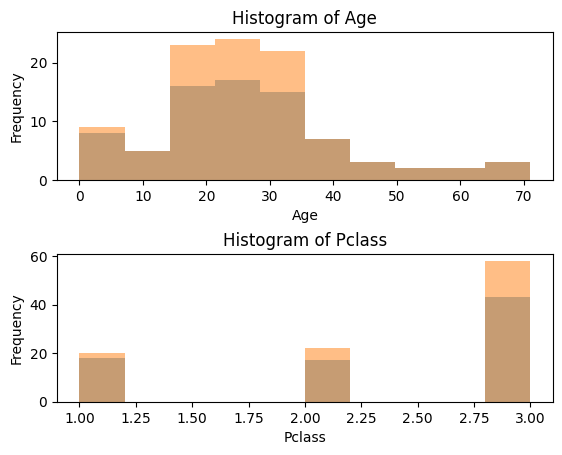

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hist_keys = ['Age','Pclass']
model_id_list = [1,2]

fig = plt.figure()
# 共通のカラムごとにヒストグラムをプロット
y_position = 1
for key in hist_keys:
    ax = fig.add_subplot(len(hist_keys), 1,y_position)
    for dict_list, name in zip([data_list,data_list_2], model_id_list):
        temp_list = [i[key] for i in dict_list]
        # データをプロット
        ax.hist(temp_list, label=name, alpha=.5)
    y_position += 1
    ax.set_title(f'Histogram of {key}')
    ax.set_xlabel(key)
    ax.set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.5)
#plt.savefig('outputs/'+test+'.jpg')

In [45]:
len(data_list)

78

In [13]:
# Predict survival for a new passenger
new_passenger = pd.DataFrame({'Pclass': [1], 'Sex': [1], 'Age': [22.0], 'Fare': [7.25]})
survival_prediction = model.predict(new_passenger)
print('Survival prediction for the new passenger:', survival_prediction)

NameError: name 'model' is not defined

In [23]:
data_list[0:-1]['Age']

TypeError: list indices must be integers or slices, not str

Accuracy: 0.7552447552447552
Survival prediction for the new passenger: [1]


In [30]:
from sqlalchemy.orm import scoped_session, sessionmaker
from sqlalchemy import create_engine, desc, func, and_, or_
from sqlalchemy.orm.exc import NoResultFound

import os
from dotenv import load_dotenv
import datetime
import pytz
import numpy as np
import pandas as pd

from base_class import PassengerData, sql_PassengerData, sql_ModelParameter, sql_Relation

jst = pytz.timezone('Asia/Tokyo')#タイムゾーンを日本に設定
load_dotenv()  # .env ファイルを読み込む
"""
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
db_name = os.getenv('DATABASE')
"""
user = 'root'
password = 'mypassword'
host = '5ad71c2936c5'
db_name = "mydatabase"

# engineの設定
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{db_name}')

# セッションの作成
db_session = scoped_session(
  sessionmaker(
    autocommit=False,
    autoflush=False,
    bind=engine
  )
)

In [7]:
model_version_id = 1
include_training = False

filters = [sql_Relation.include_training.in_([True])]
index_filters = []
if include_training == False:
    filters.append(sql_Relation.include_training.in_([include_training]))
    data_index_list = [i for i in range(start_index, end_index)]
    index_filters = [sql_Relation.data_id.in_(data_index_list)]
try:
    query = db_session.query(sql_Relation).filter(
      sql_Relation.model_version_id == model_version_id,
      or_(*filters),
      or_(*index_filters)
      )

except Exception as e:
    print(e)
    db_session.rollback()

In [8]:
results = query.all()
data_id_list = [result.data_id for result in results]

In [9]:
len(data_id_list)

0

In [135]:
from operator import attrgetter

In [176]:
url = host_name + "/reset_db"
res = requests.post(url)